<a href="https://colab.research.google.com/github/UnitForDataScience/Mini_Workshops/blob/main/Generalized_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_openml

# Get data
dat = fetch_openml(name='electricity', as_frame=True, version=1)
# Convert to dataframe
df = pd.DataFrame(dat['data'], columns=dat['feature_names'])
df['target'] = dat['target']
# Print first few rows
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [ ]:
# Organize data:
label_names = dat['target_names']
labels = dat['target']
feature_names = dat['feature_names']
features = dat['data']

# Print data:
print(label_names)
print('Class label = ', labels[0])
print(feature_names)
#print(features[0])

['class']
Class label =  UP
['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 200).fit(features, labels)

In [ ]:
clf.score(features, labels)

0.7528910663841808

In [1]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

In [3]:
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 3.25443 * x + -0.01170 * x^2 + -155.02783


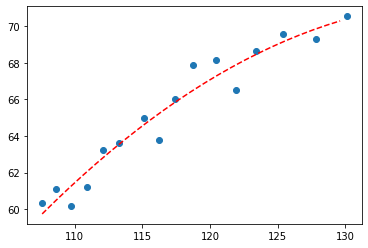

In [4]:
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()